<a href="https://colab.research.google.com/github/williamingear/bird-classification-transfer-learning/blob/main/TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bird Classification using MobileNet

by:
  Amirhossein Dallalan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
import plotly.express as px
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV3Small

### Load Dataset from Kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d gpiosenka/100-bird-species

100% 1.49G/1.49G [00:41<00:00, 47.5MB/s]
100% 1.49G/1.49G [00:41<00:00, 38.6MB/s]


In [ ]:
!unzip 100-bird-species.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/VERMILION FLYCATHER/102.jpg  
  inflating: train/VERMILION FLYCATHER/103.jpg  
  inflating: train/VERMILION FLYCATHER/104.jpg  
  inflating: train/VERMILION FLYCATHER/105.jpg  
  inflating: train/VERMILION FLYCATHER/106.jpg  
  inflating: train/VERMILION FLYCATHER/107.jpg  
  inflating: train/VERMILION FLYCATHER/108.jpg  
  inflating: train/VERMILION FLYCATHER/109.jpg  
  inflating: train/VERMILION FLYCATHER/110.jpg  
  inflating: train/VERMILION FLYCATHER/111.jpg  
  inflating: train/VERMILION FLYCATHER/112.jpg  
  inflating: train/VERMILION FLYCATHER/113.jpg  
  inflating: train/VERMILION FLYCATHER/114.jpg  
  inflating: train/VERMILION FLYCATHER/115.jpg  
  inflating: train/VERMILION FLYCATHER/116.jpg  
  inflating: train/VERMILION FLYCATHER/117.jpg  
  inflating: train/VERMILION FLYCATHER/118.jpg  
  inflating: train/VERMILION FLYCATHER/119.jpg  
  inflating: train/VERMILION FLYCATHER/120.jpg  
  inflating: train

### Load Dataset to Code

In [ ]:
train_dir = pathlib.Path('./train')
val_dir = pathlib.Path('./valid')
test_dir = pathlib.Path('./test')

In [ ]:
batch_size = 32
epochs = 10
image_size = 224

In [ ]:
trainset = keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed = 123,
    image_size = (image_size, image_size),
    batch_size=batch_size)

testset = keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed = 123,
    image_size=(image_size, image_size),
    batch_size=batch_size)

valset = keras.preprocessing.image_dataset_from_directory(
    val_dir,
    seed = 123,
    image_size=(image_size, image_size),
    batch_size=batch_size)

Found 58388 files belonging to 400 classes.
Found 2000 files belonging to 400 classes.
Found 2000 files belonging to 400 classes.


#### List of Class Names

In [ ]:
classes = ["Abbott's Rumbler",
"Abbott's Booby",
"big hornbill",
"Eastern Crowned Crane",
"Emerald Cuckoo",
"Blue-billed Fire Chest",
"Black African Oystercatcher",
"Albatross",
"Tico-tico-pardo",
"Alexandrine Parrot",
"Yellow-billed Jackdaw",
"Yellow Crown Snake",
"Brown-necked Tailor",
"American Motherwater",
"American Coot",
"American Goldfinch",
"American Falcon",
"Fawn Petit",
"Red-tailed Warbler",
"Little Star",
"Andean Goose",
"Vanelus resplendens",
"Andean Goldfinch",
"Biguatinga",
"Anianiau",
"Magenta-headed Hummingbird",
"Tamnophilid (Ipecuá)",
"Antilian euphony",
"Apapane",
"Apostle",
"Araripe Soldier",
"Grey Thrush",
"Japan Ibis",
"Amandava",
"Blue Jackdaw",
"Blue Encounter Tanager",
"White-headed Tit",
"Baikal Duck",
"White-headed Eagle",
"Hermit Ibis",
"Bali Starling",
"Orange Oriole",
"Cambacica",
"barred-tailed guan",
"Eurylaimus javanicus",
"Band Pita",
"Red-breasted Stilt",
"Fusel",
"Barrel Owl",
"Chimney Swallow",
"Little Boy",
"Iceland Duck",
"Bay-breasted Parrot",
"Red-breasted Bearded",
"Northeast Araponga",
"Mustached Tit",
"Kingfisher",
"Paradise Bird",
"Eurylaimus ochromalus",
"Black Baza",
"Yellow-tailed Black Cockatoo",
"Black Francolin",
"sea skimmer",
"Black Swan",
"Amaurornis bicolor",
"Black-throated Tit",
"Blue-throated Warbler",
"Black-headed Vulture",
"Black-billed Tit",
"Black-necked Grebe",
"Black-throated Sparrow",
"Fire-talking Parrotfish",
"Yellow-headed Woodpecker",
"Coua caerulea",
"Blue Tetraz",
"great blue heron",
"Yellow-nosed Aracari",
"Sad-sin",
"Bristle Buccaneer",
"Chloropsis kinabaluensis",
"Peacock Pheasant",
"Brandt's Cormorant",
"American Creeper",
"Black Tern",
"Brown Thrasher",
"Bulwer's Pheasant",
"Turkey",
"Cactus-wren",
"California Condor",
"California Gull",
"California Partridge",
"Canary",
"Metallic Starling",
"Orange-throated Long Claw",
"Cape-May Warbler",
"Cape Rocks Blackbird",
"Heron",
"Bad",
"Rose Bee-eater",
"Red-billed Tern",
"Cassowary",
"American Pickaxe",
"Blue Parrot",
"Black-collared jay",
"Loris-Love-Love",
"Junk yard",
"Chinese Bamboo Partridge",
"Chinese Heron",
"Splitter Sparrow",
"Red-breasted Tapaculo",
"Suck Partridge",
"Tinguaçu-rust",
"Cinnamon Flycatcher",
"Colored teal",
"Columbian Nucifraga",
"Sierra Rooster",
"Cockatoo",
"Black-necked Aracari",
"Streaked-headed Star",
"Quiscalus quiscula",
"Eaves Swallow",
"Common Iora",
"Big Loaf",
"Nutall Nighthawk",
"Starling",
"Copper-tailed Cucal",
"Dromadidae",
"Black-winged Hawk",
"Yellow Woodpecker",
"Alca-de-crested",
"Carcara",
"Crest coua",
"Lophura ignita",
"crested kingfisher",
"Sitta carolinensis",
"Black Japu",
"Shriketit-Australian",
"Crimson Chat",
"Aethopyga siparaja",
"Crow",
"Gura",
"Tody-Cuban",
"Tocororo",
"Araçari-mulatto",
"D'Arnaud's Barbet",
"Dark-Eyed Reed",
"Little Crane",
"Double-clawed-finch",
"Eared Cormorant",
"Two-Eyed Fig Parrot",
"Cute Woodpecker",
"Pseudeos fuscata",
"Pitta-eared",
"Eastern Bluebird",
"Gold Weaver",
"Pedro-celouro",
"Rosella-multicolor",
"Spotted Sparrow",
"Elegant-trogon",
"Elliot's Pheasant",
"Emerald Sunflower",
"Emperor penguin",
"Australian Emu",
"Enggano Myna",
"Oriole",
"Bulltail",
"Goldfinch",
"Common Dove",
"Coccothraustes vespertinus",
"Irena",
"Fairy Tern",
"Fiordland Penguin",
"Myzornis pyrrhoura",
"Sericulus ardens",
"Fire-colored Tanager",
"Flamingo",
"Frigate",
"Gambel's Partridge",
"Gang-gang cockatoo",
"Gila Woodpecker",
"Golden Twinkle",
"Black Ibis",
"Concolor Crinifer",
"Goldenwing Warbler",
"Golden-cheeked Warbler",
"Chlorophonia callophrys",
"Royal Eagle",
"Golden Pheasant",
"Golden Kite",
"Gould's Diamond",
"Dumetella carolinensis",
"Grey Suiriri",
"Grey Partridge",
"Grey Owl",
"Jacamaraçu",
"I saw you",
"Big Urutau",
"Big Partridge",
"Calyptomena viridis",
"Green Jay",
"Chinese Cissa",
"Grey Plover",
"Crotophaga sulcirostris",
"Persian Tauraco",
"Numididae",
"Gurney Pita",
"Gyrfalcon Hawk",
"Hammer head",
"Harlequin Duck",
"Harlequin Quail",
"harpy eagle",
"Hawaii Goose",
"Big beak",
"Vanga-de-prévost",
"Fire Sanhaço",
"Tarsiger rufilatus",
"Nepal Pheasant",
"Gypsy-jacu",
"Capuchin Merganser",
"Upupidae",
"Hornbeaks",
"Jacu-horned",
"Lantern-horned",
"Golden Horn",
"Haemorhous mexicanus",
"House Sparrow",
"great hyacinth macaw",
"Moor",
"Ibidorhyncha struthersii",
"Imperial Cormorant",
"Seagull-nun",
"Indian Bustard",
"Bengal Pita",
"Coracias benghalensis",
"Passerina cyanea",
"Inland Atuira",
"Ivory Gull",
"I saw",
"Jaburu",
"Snipe-Galician",
"True Conure",
"Akahige Larvivora",
"Caulker",
"Cagu",
"Caçapo",
"Double-collared Plover",
"King vulture",
"Kuis",
"Cucaburra",
"Calamospiza melanocorys",
"Passerina amoena",
"Little Marabou",
"Lilac-breasted Roller",
"dwarf robin",
"Little Owl",
"Anseranas semipalmata",
"Ocyceros griseus",
"Shallowfish",
"Zosterops maderaspatanus",
"Maleo",
"Male Duck",
"Mandarin Duck",
"Mangrove Caterpillar",
"Marabout",
"big booby",
"Masked Lapwing",
"Mika Pheasant",
"Beeping Dove",
"Maina",
"Nicobar Pigeon",
"Philemon corniculatus",
"Northern Cardinal",
"Northern flicker",
"Fulmar-glacial",
"gannet",
"The color",
"Yellow-fronted Jacana",
"Imitating Thrush",
"Blue Parrot",
"Orange Bishop",
"Trumpeter Duck",
"Ocellated Turkey",
"Gallirallus okinawae",
"Passerina leclancherii",
"Eastern Bay Owl",
"Fish Eagle",
"Common Ostrich",
"Red-crowned Warbler",
"Oystercatcher",
"Passerina ciris",
"Hawaii Palila",
"Out-of-Paradise",
"Parrot Torda",
"Red tit",
"Phrygillus patagonicus",
"Blue Peacock",
"Pelican",
"Peregrine Falcon",
"Philippine Eagle",
"Petroica rodinogaster",
"Pomarine miller",
"Puffins",
"Haemorhous purpureus",
"Blue Water Chicken",
"Blue Swallow",
"Common Cayman",
"Pygmy Woodpecker",
"Resplendent Quetzal",
"Moluccan Loris",
"Snorkelling",
"Red Bee-eater",
"Erythropitta erythrogaster",
"Red Eyebrows Diamond",
"Red-faced Cormorant",
"Red-faced Parrotfish",
"Weaver of Madagascar",
"Zarro-American",
"Melanerpes erythrocephalus",
"Hummingbird",
"Kasumba Harpacts",
"Red-tailed Vulture",
"Leiotrichidae",
"Red-winged Warbler",
"Red Mustache Bulbul",
"Sericulus chrysocephalus",
"Collar Pheasant",
"Roadrunner",
"American thrush",
"common pigeon",
"Rose-faced Inseparable",
"big-legged buzzard",
"Maria Fan",
"Red-necked Hummingbird",
"Halcyon coromanda",
"Actenoids concrete",
"Red Juruva",
"Bicolor Garrulax",
"Barrier Swallow",
"Canadian Crane",
"Red-horned Pheasant",
"Ptilinopus porphyraceus",
"Guara",
"Arracanga",
"Scarlet Sanhaçu",
"Shoebill Stork",
"White-backed Sandpiper",
"Calcarius pictus",
"Little White Egret",
"Snow owl",
"Sora",
"Cotinga-pintada",
"Malurus splendens",
"Eurynorhynchus pygmeus",
"Spoon spoon",
"Ailuroedus maculosus",
"Urocissa ornata",
"Steam Ducks",
"Pelargopsis capensis",
"Red Bengali",
"Eared Owl",
"Scratched Mango",
"Small-striped Swallow",
"Lamprotornis superbus",
"Swinhoe's Pheasant",
"Orthotomus sutorius",
"Taiwan Blue Jackdaw",
"Takahe",
"Tribonyx mortierii",
"Common Teddy",
"Baeolophus bicolor",
"Toucans",
"Setophaga townsendi",
"Tree Swallow",
"Suiriri",
"Trumpeter Swan",
"Red-headed Vulture",
"Supercilious Eumomota",
"Anambé-Black",
"Mary Thrush",
"Turpial",
"Prince",
"Gura victory",
"Tachycineta thalassina",
"Turaco-Violet",
"Painted Vulturine",
"Wallcreeper",
"Bean curassow",
"Vanelus senegallus",
"Galician Sandpiper",
"Cinerea Porza",
"Tauraco leucotis",
"Mountain Crow",
"Orange-billed Strawtail",
"White-throated Bee-eater",
"Wild Turkey",
"Wilson's Bird-of-Paradise",
"Caroline Duck",
"Dicaeum melanoxanthum",
"Xexeu",
"Yellow-headed Crane"]

### Show Data Sample

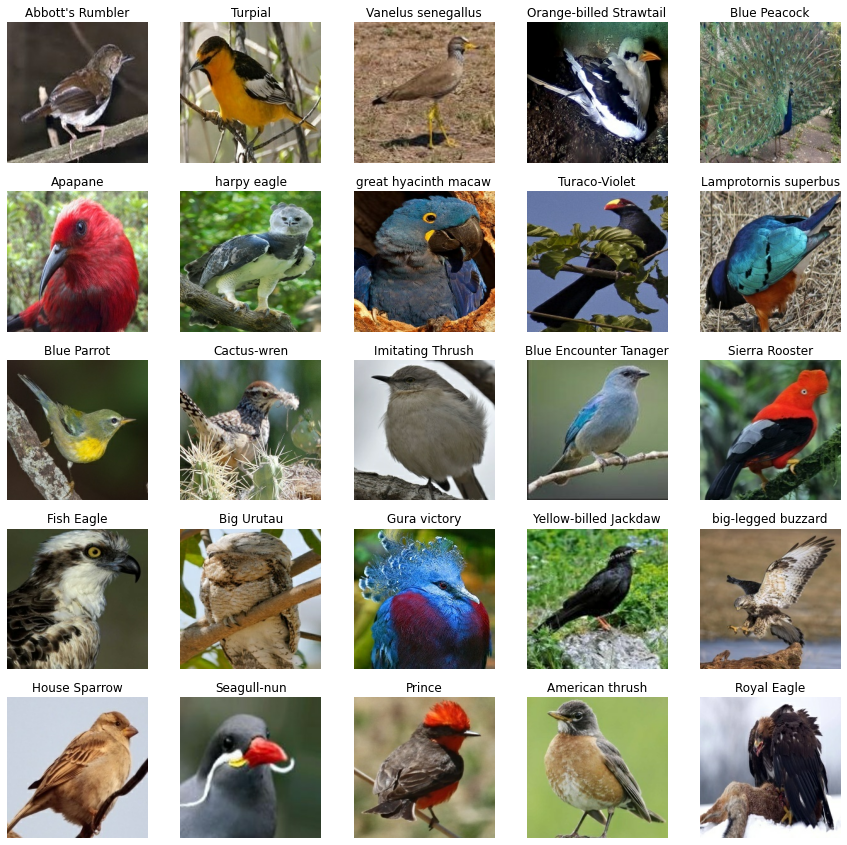

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in trainset.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(classes[labels[i]])
        plt.axis('off')

### Create Model

In [ ]:
base_model = MobileNetV3Small(input_shape = (image_size, image_size, 3),
                                            classes = 400,
                                            include_top = False,
                                            weights = 'imagenet')

4349952/4334752 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False
base_model.summary()

Model: "MobilenetV3small"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling[0][0]']              
                                )                                                                 
                                                                                   

In [ ]:
data_augmentation = Sequential([keras.layers.RandomFlip('horizontal'), 
                                keras.layers.RandomRotation(0.2)])

num_classes = len(classes)

inputs = keras.Input(shape=(image_size, image_size, 3))
x = keras.applications.mobilenet_v3.preprocess_input(inputs)
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)

outputs = Dense(num_classes, activation='softmax')(x)
model = Model(inputs, outputs)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 MobilenetV3small (Functiona  (None, 7, 7, 576)        939120    
 l)                                                              
                                                                 
 global_average_pooling2d_1   (None, 576)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 576)               0         
                                                                 
 dense_1 (Dense)             (None, 400)               230800    
                                                                 
Total params: 1,169,920
Trainable params: 230,800
Non-train

### Fit Model

In [ ]:
es = keras.callbacks.EarlyStopping(patience = 1,
                                   restore_best_weights = True)

In [ ]:
history = model.fit(trainset, 
                    validation_data = valset,
                    epochs = epochs,
                    callbacks=[es])

Epoch 1/10
1825/1825 [==============================] - 816s 445ms/step - loss: 1.7617 - accuracy: 0.6681 - val_loss: 0.4754 - val_accuracy: 0.9215
Epoch 2/10
1825/1825 [==============================] - 732s 401ms/step - loss: 0.6043 - accuracy: 0.8658 - val_loss: 0.2903 - val_accuracy: 0.9435
Epoch 3/10
1825/1825 [==============================] - 721s 395ms/step - loss: 0.4426 - accuracy: 0.8942 - val_loss: 0.2391 - val_accuracy: 0.9445
Epoch 4/10
1825/1825 [==============================] - 720s 394ms/step - loss: 0.3598 - accuracy: 0.9110 - val_loss: 0.2057 - val_accuracy: 0.9475
Epoch 5/10
1825/1825 [==============================] - 727s 398ms/step - loss: 0.3046 - accuracy: 0.9229 - val_loss: 0.1861 - val_accuracy: 0.9510
Epoch 6/10
1825/1825 [==============================] - 708s 388ms/step - loss: 0.2712 - accuracy: 0.9297 - val_loss: 0.1734 - val_accuracy: 0.9575
Epoch 7/10
1825/1825 [==============================] - 707s 387ms/step - loss: 0.2447 - accuracy: 0.9350 - val_

In [ ]:
# Save model
model.save('model.h5')

In [ ]:
# Load model
#from keras.models import load_model
#model = load_model('model.h5')

### Result

In [ ]:
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']

val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

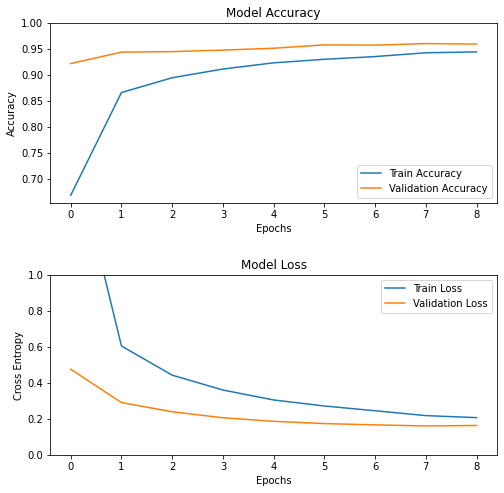

In [ ]:
plt.figure(figsize=(8, 15))

plt.subplot(2, 1, 1)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Model Accuracy')

plt.subplot(2, 1, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Model Loss')

plt.subplots_adjust(bottom=0.1, 
                    top=0.5, 
                    hspace=0.4)
plt.show()

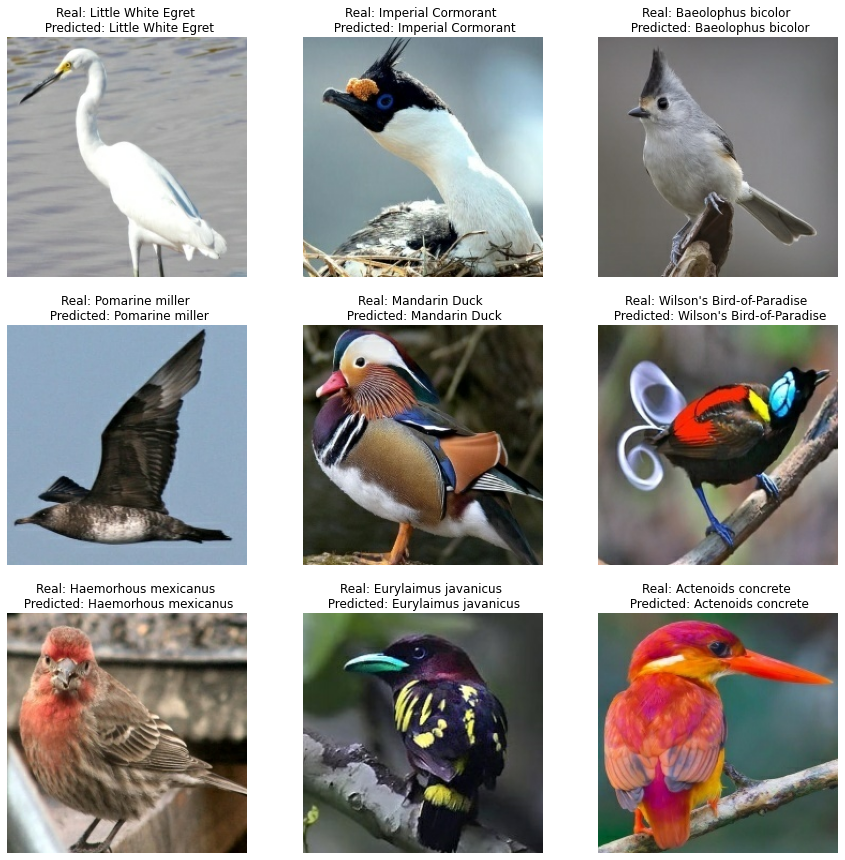

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in testset.take(1):
    prediction = model.predict(images,batch_size=32)
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        pred = np.argmax(prediction[i])
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(f'Real: {classes[labels[i]]} \n Predicted: {classes[pred]}')
        plt.axis('off')

In [ ]:
testset_unbatch = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    seed=None,
    shuffle=False,
    image_size = (image_size, image_size),
    batch_size = image_size,)

images = list(testset_unbatch.map(lambda x, y: x))
labels = list(testset_unbatch.map(lambda x, y: y))

Found 2000 files belonging to 400 classes.


In [ ]:
y_test = np.concatenate([y for x, y in testset_unbatch], axis=0)
prediction = model.predict(testset_unbatch)
pred = np.argmax(prediction,axis=1)

In [ ]:
print(f'Test Accuracy = {accuracy_score(pred,y_test)}')

Test Accuracy = 0.9675


In [ ]:
print(classification_report(y_test, pred, target_names=classes))

                              precision    recall  f1-score   support

            Abbott's Rumbler       1.00      1.00      1.00         5
              Abbott's Booby       0.75      0.60      0.67         5
                big hornbill       1.00      1.00      1.00         5
       Eastern Crowned Crane       1.00      1.00      1.00         5
              Emerald Cuckoo       1.00      1.00      1.00         5
      Blue-billed Fire Chest       1.00      1.00      1.00         5
 Black African Oystercatcher       1.00      1.00      1.00         5
                   Albatross       0.83      1.00      0.91         5
             Tico-tico-pardo       1.00      1.00      1.00         5
          Alexandrine Parrot       0.83      1.00      0.91         5
       Yellow-billed Jackdaw       1.00      0.80      0.89         5
          Yellow Crown Snake       1.00      0.80      0.89         5
         Brown-necked Tailor       1.00      1.00      1.00         5
        American Mo